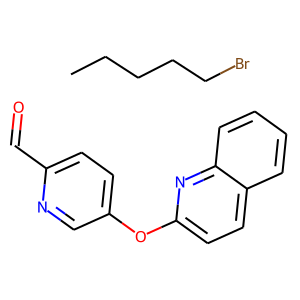

In [3]:
import torch
from rdkit import Chem

smi = "CCCCCBr.O=Cc1ccc(Oc2ccc3ccccc3n2)cn1"
smi2 = "CCCCCC(O)c1ccc(Oc2ccc3ccccc3n2)cn1"

mol1 = Chem.MolFromSmiles(smi)
mol2 = Chem.MolFromSmiles(smi2)

from rdkit.Chem import Draw
img = Draw.MolToImage(mol1, size=(300, 300))
img

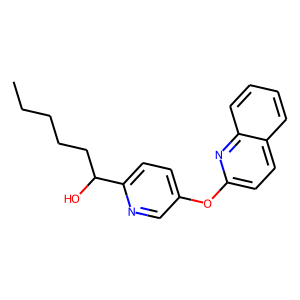

In [5]:
img = Draw.MolToImage(mol2, size=(300, 300))
img

In [6]:
from rdkit import Chem

def find_corresponding_atoms(reactant_smiles, product_smiles):
    # 将SMILES字符串转换为RDKit的分子对象
    reactant_mol = Chem.MolFromSmiles(reactant_smiles)
    product_mol = Chem.MolFromSmiles(product_smiles)
    
    # 确保分子对象不为None
    if reactant_mol is None or product_mol is None:
        print("无法解析SMILES字符串。")
        return
    
    # 创建对应原子的字典
    corresponding_atoms = {}
    
    # 遍历反应物中的原子
    for reactant_atom in reactant_mol.GetAtoms():
        reactant_atom_idx = reactant_atom.GetIdx()
        reactant_atom_symbol = reactant_atom.GetSymbol()
        
        # 在生成物中查找对应的原子
        for product_atom in product_mol.GetAtoms():
            product_atom_idx = product_atom.GetIdx()
            product_atom_symbol = product_atom.GetSymbol()
            
            # 如果原子符号和原子索引相匹配，则将它们添加到对应原子的字典中
            if reactant_atom_symbol == product_atom_symbol:
                corresponding_atoms[reactant_atom_idx] = product_atom_idx
                break
    
    return corresponding_atoms

# 示例用法
if __name__ == "__main__":
    reactant_smiles = "CCO"  # 替换为您的反应物的SMILES字符串
    product_smiles = "CC(=O)O"  # 替换为您的生成物的SMILES字符串
    
    corresponding_atoms = find_corresponding_atoms(reactant_smiles, product_smiles)
    print(corresponding_atoms)


{0: 0, 1: 0, 2: 2}
